## Model 2: Logistic Regression


#### Imports

In [5]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from tqdm import tqdm

#### Bag of Words Implementation


In [6]:
# BagOfWords class, taken from PA 1.1
class BagOfWords:
    def __init__(self):
        self.vocabulary = {}
    
    def fit(self, documents):
        # documents : array of strings
        unique_words = set()
        for doc in documents:                   # for each string
            unique_words.update(doc.split())    # add all words to set

        self.vocabulary = {word: idx for idx, word in enumerate(unique_words)}
    
    def vectorize(self, sentence):  # convert sentence into vector
        
        vector = np.zeros(len(self.vocabulary), dtype=int)

        for word in sentence.split():
            if word in self.vocabulary:
                vector[self.vocabulary[word]] += 1
        return vector
    
    def transform(self, documents):
        # use vectorize on each row of the data
        return np.array([self.vectorize(doc) for doc in documents])



bow = BagOfWords()

#### Test - Train Split


In [7]:
df_cleaned = pd.read_csv(r"cleaned.csv")
df_inputs = df_cleaned.drop(columns=["Gold Labels"])
df_outputs = df_cleaned["Gold Labels"]

# Split the dataset into training and test sets with test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=0.3, random_state=15)

print(X_train.shape)
print(X_test.shape)
df_inputs.head()


(784, 4)
(337, 4)


,Article IDs,Titles,Links,Contents
0,0,سدھو موسے والا کے والدین نے اپنے چھوٹے بیٹے کا...,https://urdu.geo.tv/latest/386103-,بھارت پنجاب سے تعلق رکھنے معروف آنجہانی گلوکا...
1,1,گانے میں لارنس بشنوئی کا نام، گینگسٹر کا ایک ب...,https://urdu.geo.tv/latest/386086-,بھارت بدنام زمانہ گینگ لارنس بشنوئی نے بار بال...
2,2,وہ کریں جو آپ کی بیگم کہتی ہے: فلک شبیر کا شو...,https://urdu.geo.tv/latest/386083-,اداکارہ سارہ خان شوہر گلوکار فلک شبیر نے شوہرو...
3,3,سلمان کے بعد شاہ رخ خان کو بھی جان سے مارنےکی ...,https://urdu.geo.tv/latest/385991-,ممبئی بالی وڈ اداکار سلمان خان بعد اب کنگ خان ...
4,4,برطانوی پارلیمنٹ نے ماہرہ خان کو لائف ٹائم اچی...,https://urdu.geo.tv/latest/385956-,برطانیہ پارلیمنٹ نے اداکارہ ماہرہ خان کو فنی خ...



#### Converting into Bag of Words

In [8]:
bag = BagOfWords()
bag.fit(X_train["Contents"])
X_train_vectors = bag.transform(X_train['Contents'])
X_test_vectors = bag.transform(X_test['Contents'])

print(len(bag.vocabulary))
bag.vocabulary

11281


{'انجری': 0,
 'گہرا': 1,
 'کیماڑی': 2,
 'رکشہ': 3,
 'اہلکار': 4,
 'ڈویلپرکمپنی': 5,
 'ضروریہ': 6,
 'میوے': 7,
 'سلمان': 8,
 'لونے': 9,
 'مفاہمتی': 10,
 'پرامن': 11,
 'قدیم': 12,
 'لیجنڈری': 13,
 'گھٹنے': 14,
 'عموماً': 15,
 'مہتا': 16,
 'ریکارڈ': 17,
 'مسلسل': 18,
 'ایڈمنسٹریٹر': 19,
 'سوئنگ': 20,
 'اورباتھ': 21,
 'اپنے': 22,
 'کیریکٹر': 23,
 'بھگ': 24,
 'ٹریپ': 25,
 'قلعہ': 26,
 'سوئٹزرلینڈ': 27,
 'زوبی': 28,
 'ویزہ': 29,
 'چارٹرڈ': 30,
 'مددگار': 31,
 'ماہرین': 32,
 'ہوجائے': 33,
 'چمن': 34,
 'ایمفیبیئنز': 35,
 'معتدل': 36,
 'بیچنے': 37,
 'ہیلری': 38,
 'بھائی،': 39,
 'رُجحان': 40,
 'فالو': 41,
 'کیمرا': 42,
 'موضوعات': 43,
 'فیصد': 44,
 'دوست،': 45,
 'سننے': 46,
 'ملیکہ': 47,
 'نکلنے': 48,
 'ریسٹورنٹس،': 49,
 'نیپالی': 50,
 'گزاری،': 51,
 'معقول': 52,
 'پروڈکٹ': 53,
 'ڈھانپ': 54,
 'شعیب': 55,
 'ٹیئرون': 56,
 'پوتا': 57,
 'بوجھل': 58,
 'پڑھیںدوسرا': 59,
 'کینو،': 60,
 'پھیلتا': 61,
 'تختیوں': 62,
 'کمپنیاں': 63,
 'سکتا': 64,
 'کلدیپ': 65,
 'شدت': 66,
 'مزہ': 67,
 'ہوزی': 68,
 'سیکھے':

## Evaluation Metrics

In [9]:
# For evaluation, taken from 1.2

def accuracy_own(predicted_labels, true_labels): 
  return np.mean(predicted_labels == true_labels)


def make_confusion_matrix_own(predicted_labels, true_labels): 
  num_classes = len(np.unique(true_labels))
  confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
  for true, predicted in zip(true_labels, predicted_labels):
      confusion_matrix[true][predicted] += 1
  
  return confusion_matrix


def make_heat_map(confusion_matrix, title):
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
  plt.title(title)
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()


def precision_own(confusion_matrix, class_label):
  tp = confusion_matrix[class_label, class_label]
  fp = np.sum(confusion_matrix[:, class_label]) - tp
  
  if (tp + fp) == 0:
      return 0
  else:
      return tp / (tp + fp)

def recall_own(confusion_matrix, class_label):
  tp = confusion_matrix[class_label, class_label]
  fn = np.sum(confusion_matrix[class_label, :]) - tp
  
  if (tp + fn) == 0:
      return 0
  else:
      return tp / (tp + fn)

def f1_score_own(precision, recall):
  if (np.all(precision == 0) and np.all(recall == 0)):
      return 0
  else:
      return 2 * (precision * recall) / (precision + recall)


def macro_average_f1_own(confusion_matrix):
  num_classes = confusion_matrix.shape[0]
  f1_scores = []
  
  for class_label in range(num_classes):
      precision_value = precision_own(confusion_matrix, class_label)
      recall_value = recall_own(confusion_matrix, class_label)
      f1 = f1_score_own(precision_value, recall_value)
      f1_scores.append(f1)
  
  return np.mean(f1_scores)


def evaluate(predicted_labels, true_labels):
  accuracy_score = accuracy_own(predicted_labels, true_labels)
  confusion_matrix = make_confusion_matrix_own(predicted_labels, true_labels)
  macro_f1 = macro_average_f1_own(confusion_matrix)
  
  # Display my nicely formatted report
  print(f"Accuracy: {accuracy_score:.4f}") # .4f rounds it up to 4 decimal places
  print(f"Macro-Average F1 Score: {macro_f1:.4f}")
  print("\nConfusion Matrix:")
  make_heat_map(confusion_matrix, title="Confusion Matrix Heatmap")
  
  return accuracy_score, macro_f1, confusion_matrix

## Logistic Regression Classifier 
- `LogisticRegression` class implemented
- Highly inspired by PA 2.2

In [10]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.1, epochs = 200):
        self.learning_rate = learning_rate
        self.epoch = epochs
        self.bias = None
        self.weights = None
        self.losses = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))  

    def fit(self, x_train, y_train, reg_lambda=0.01):
        self.weights = np.zeros(x_train.shape[1])
        self.bias = 0
        self.losses = []
        
        for _ in tqdm(range(self.epoch)):
            linear_model = np.dot(x_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (np.dot(x_train.T, (y_pred - y_train)) + reg_lambda * self.weights) / y_train.size
            db = np.sum(y_pred - y_train) / y_train.size
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            self.losses.append(self.cross_entropy_loss(y_train, y_pred))

    def predict(self, x_test):
        probabilities = self.sigmoid(np.dot(x_test, self.weights) + self.bias)
        labels = np.round(probabilities)
        return labels, probabilities


    def evaluate(self, y_true, y_pred):
        accuracy = np.mean(y_pred == y_true)

        num_classes = len(np.unique(y_true))
        confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
        for true, predicted in zip(y_true, y_pred):
            confusion_matrix[int(true)][int(predicted)] += 1

        macro_f1_score=macro_average_f1_own(confusion_matrix)
    
        return accuracy, macro_f1_score, confusion_matrix

##  Implementation of One vs All Classification

We build five classifiers, one for each class.

- We have created a plot for each of the classifier with the losses.

100%|██████████| 200/200 [00:13<00:00, 14.38it/s]


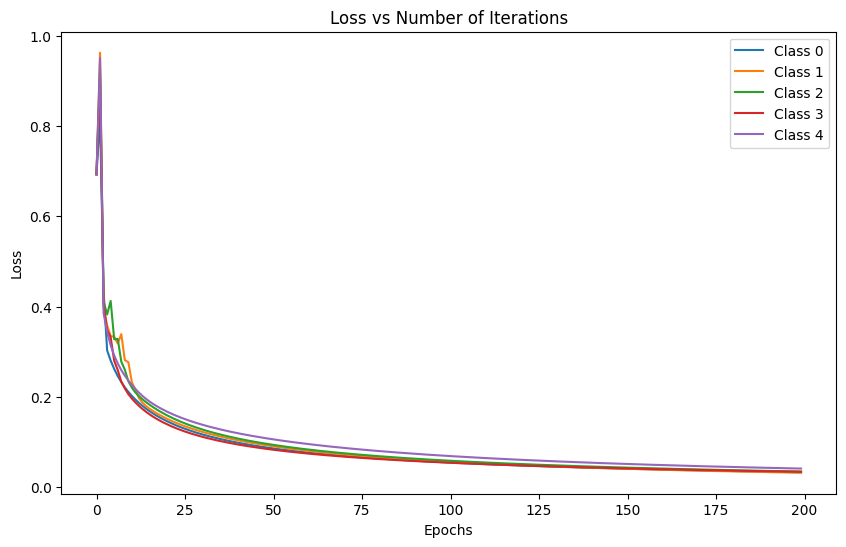

In [11]:
# One-vs-Rest Classifiers
classifiers = {}
losses = {}  # To store losses for each classifier

unique_classes = np.unique((y_train))
label_mapping = {label: idx for idx, label in enumerate(unique_classes)}
y_train_encoded = np.array([label_mapping[label] for label in y_train])

for i in range(5):
    y_binary = (y_train_encoded == i).astype(int)  # Current positive class, use this while fitting to train data
    classifiers[i] = LogisticRegression(learning_rate=0.1, epochs=200)       # declare your logistic regression model here 
    classifiers[i].fit(X_train_vectors, y_binary)
    cost = classifiers[i].losses                 # fit on your training data and store the cost.
    losses[i] = cost            # Save the cost values for plotting

# Plot training loss for each classifier
epochs = np.arange(0, classifiers[0].epoch)
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(epochs, losses[i], label=f'Class {i}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Number of Iterations')
plt.legend()
plt.show()


## Evalution of our model on test data

In [12]:
# Evaluate each binary classifier
y_test_encoded = np.array([label_mapping[label] for label in y_test])

results = {
    'Class': [],
    'Probs':[],
    'Accuracy': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

for i in range(5):  
    predicted_class, probability = classifiers[i].predict(X_test_vectors)     # predict on your test data
    accuracy, macro_f1, cm = classifiers[i].evaluate((y_test_encoded==i).astype(int), predicted_class)
    
    results['Class'].append(i)
    results['Probs'].append(probability)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(macro_f1)
    results['Confusion Matrix'].append(cm)

results_df = pd.DataFrame(results)
results_df.head()

,Class,Probs,Accuracy,F1 Score,Confusion Matrix
0,0,"[0.0015559427086011552, 0.03243611715722608, 4...",0.976261,0.962317,"[[267, 1], [7, 62]]"
1,1,"[0.9671521644679615, 0.006945698264486899, 0.0...",0.979228,0.964282,"[[274, 0], [7, 56]]"
2,2,"[0.009237081833353977, 0.02487121762337027, 5....",0.967359,0.946638,"[[268, 2], [9, 58]]"
3,3,"[0.012058366771984852, 0.918546062278506, 7.79...",0.970326,0.951193,"[[269, 2], [8, 58]]"
4,4,"[0.031214904531799596, 0.010733051853039627, 0...",0.967359,0.949055,"[[264, 1], [10, 62]]"


In [13]:
results_df.drop('Probs',axis=1)

,Class,Accuracy,F1 Score,Confusion Matrix
0,0,0.976261,0.962317,"[[267, 1], [7, 62]]"
1,1,0.979228,0.964282,"[[274, 0], [7, 56]]"
2,2,0.967359,0.946638,"[[268, 2], [9, 58]]"
3,3,0.970326,0.951193,"[[269, 2], [8, 58]]"
4,4,0.967359,0.949055,"[[264, 1], [10, 62]]"


## Assigning labels for multiclass predictions

- Here we follow the mappings we created for `y_train` and `y_test`
- We assign the index to it's corresponding label.
- For each article, we compare all the probabilities from each classifer and assign the label of the highest probability class.

In [14]:
class_labels = ['Class 0: entertainment', 
                'Class 1: business', 
                'Class 2: sports',
                'Class 3: science-technology',
                'Class 4: world']

all_probabilities = np.column_stack(results['Probs'])  
multiclass_predictions = np.argmax(all_probabilities, axis=1)
final_labels = [class_labels[pred] for pred in multiclass_predictions]
print(final_labels)

['Class 1: business', 'Class 3: science-technology', 'Class 4: world', 'Class 0: entertainment', 'Class 4: world', 'Class 4: world', 'Class 4: world', 'Class 0: entertainment', 'Class 4: world', 'Class 0: entertainment', 'Class 3: science-technology', 'Class 4: world', 'Class 0: entertainment', 'Class 3: science-technology', 'Class 2: sports', 'Class 4: world', 'Class 2: sports', 'Class 3: science-technology', 'Class 2: sports', 'Class 1: business', 'Class 3: science-technology', 'Class 0: entertainment', 'Class 0: entertainment', 'Class 2: sports', 'Class 2: sports', 'Class 0: entertainment', 'Class 0: entertainment', 'Class 0: entertainment', 'Class 2: sports', 'Class 4: world', 'Class 3: science-technology', 'Class 3: science-technology', 'Class 2: sports', 'Class 2: sports', 'Class 2: sports', 'Class 3: science-technology', 'Class 1: business', 'Class 1: business', 'Class 2: sports', 'Class 0: entertainment', 'Class 3: science-technology', 'Class 2: sports', 'Class 2: sports', 'Cla

## Multiclass Evaluation

Accuracy: 0.9644
Macro-Average F1 Score: 0.9649

Confusion Matrix:


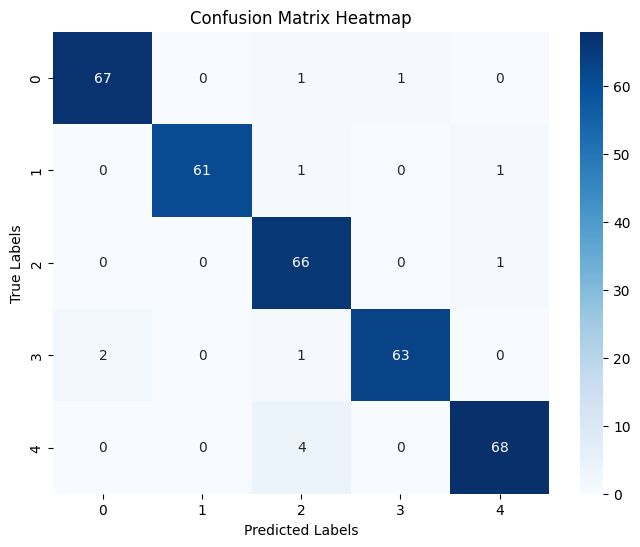

In [15]:
accuracy, m_f1, c = evaluate(multiclass_predictions, y_test_encoded)